# Data Preparation

In [1]:
from numpy import asarray
from numpy import save
from predictor.driver import Predictor
from predictor.src import utils
from predictor.driver import Predictor
from predictor.src import utils

import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

training_data, names_list, scores_list = utils.load_training_data()
X, y = zip(*training_data)
X = list(X)
y = list(y)
for i in range(len(X)):
    X[i] = list(X[i])
    scores_list[i] = list(scores_list[i])

X, y, indices = np.array(X), np.array(y), np.array(range(len(y)))

non_zero_indices = []
for i in range(len(X[0])):
    if sum(X[:, i]) > 0:
        non_zero_indices.append(i)
X = X[:, non_zero_indices]

(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, indices, test_size=0.3, random_state=5)

scores_filtered = [scores_list[i] for i in indices_test]

# scaler = preprocessing.StandardScaler().fit(X_train)
# in_max_scaler = preprocessing.MinMaxScaler()

# X_train = preprocessing.normalize(X_train, norm='l2')

# m = np.mean(X_train, axis=0) # array([16.25, 26.25])
# std = np.std(X_train, axis=0) # array([17.45530005, 22.18529919])

# X_train = 0.5 * (np.tanh(0.01 * ((X_train - m) / std)) + 1)

predictor = Predictor()

# Current Decision Tree Classifier

Number of used and non-zero features:  27


/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best GridSearch Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features=21,
                       max_leaf_nodes=162, min_samples_leaf=2, random_state=5)
Best GridSearch Params:  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 21, 'max_leaf_nodes': 162, 'min_samples_leaf': 2, 'min_samples_split': 2}
Num Training Circuits:  1418
Num Test Circuits:  608
Best Training accuracy:  0.7242621808590056
Test accuracy:  0.71875
Compilation paths from Train Data:  {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Compilation paths from Test Data:  {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}
Compilation paths from Predictions:  {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20}
# Entries Graph:  608


/Users/nils/Documents/repos/MQTPredictor/predictor/driver.py:344: RuntimeWarning: overflow encountered in double_scalars
  plt.plot(i, tmp_res[j] / max_score, "b.", alpha=1.0, markersize=1.7)
/Users/nils/Documents/repos/MQTPredictor/predictor/driver.py:348: RuntimeWarning: overflow encountered in double_scalars
  tmp_res[y_pred_sorted_accordingly[i]] / max_score,


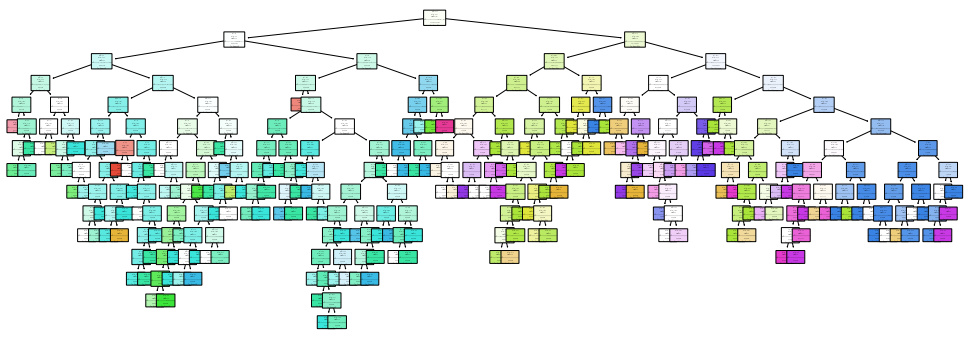

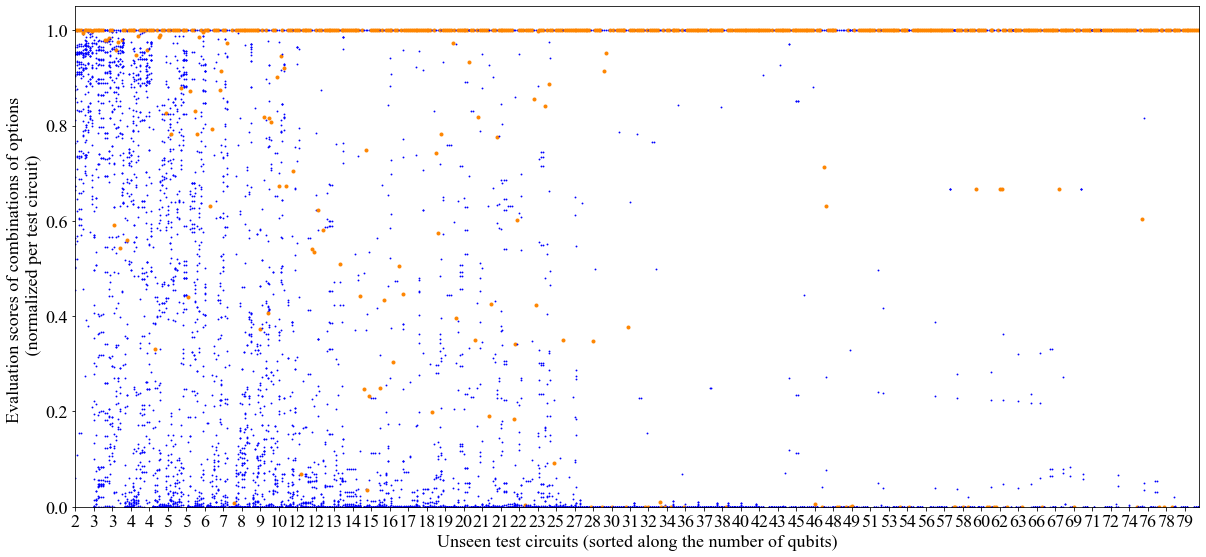

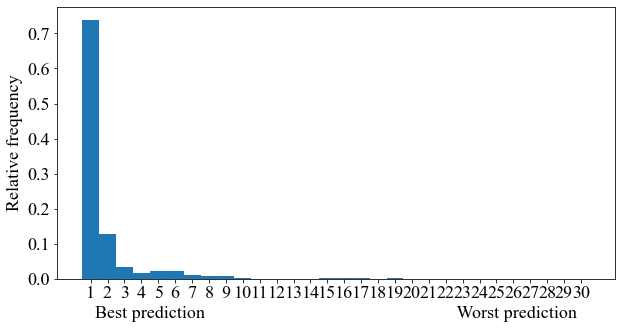

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
predictor.train_decision_tree_classifier(X, y, names_list, scores_list);

# Random Forest

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


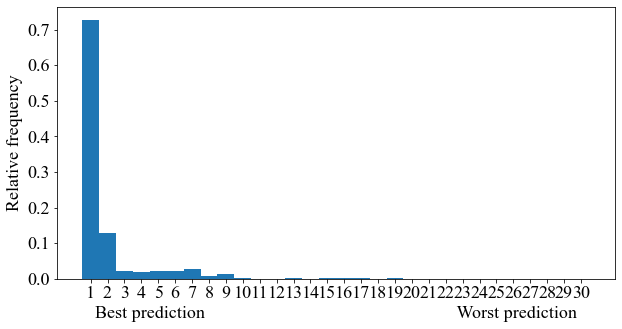

Best Accuracy:  0.7468073458418354
Top 3:  0.8766447368421053


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=0)

tree_param = [
    {
        "n_estimators": list(range(1, 15, 4)),
        "max_features": ["auto", "sqrt"],
        "max_depth": list(range(1, 30, 5)),
        "min_samples_split": list(range(2, 20, 5)),
        "min_samples_leaf": list(range(2, 20, 5)),
        "bootstrap": [True, False],
    },
]

clf = GridSearchCV(clf, tree_param, cv=5, n_jobs=8).fit(X_train, y_train)


y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# Nearest Neighbor

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


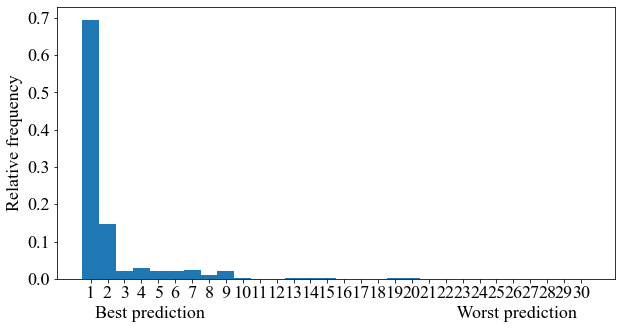

Best Accuracy:  0.6748793112029066
Top 3:  0.8634868421052632


In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1, 10, 1))
clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# SVM

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


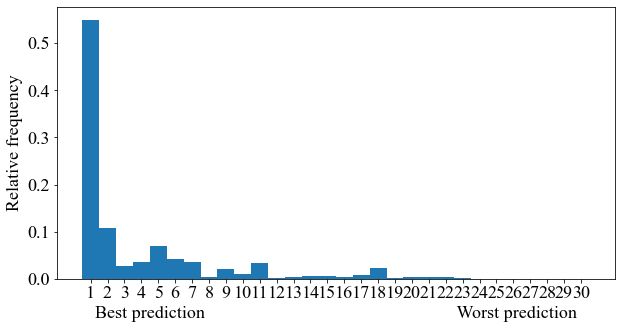

Best Accuracy:  0.552923903847111
Top 3:  0.6858552631578947


In [5]:
from sklearn import svm

clf = svm.SVC()
param_grid = {"C": [0.1, 1, 10], "gamma": [1, 0.1, 0.01], "kernel": ["rbf", "sigmoid"]}
clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# Naive Bayes

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


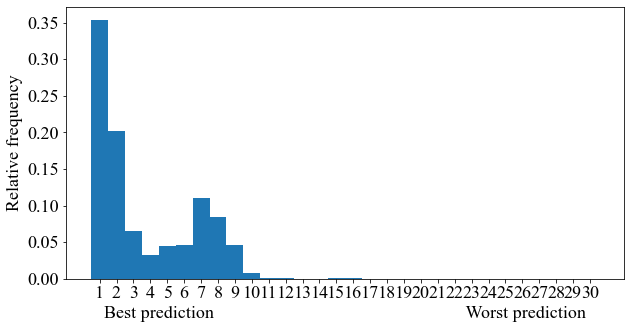

Best Accuracy:  0.2975787587717115
Top 3:  0.6217105263157895


In [6]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
param_grid = {"var_smoothing": np.logspace(0, -9, num=100)}
clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# SGD

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


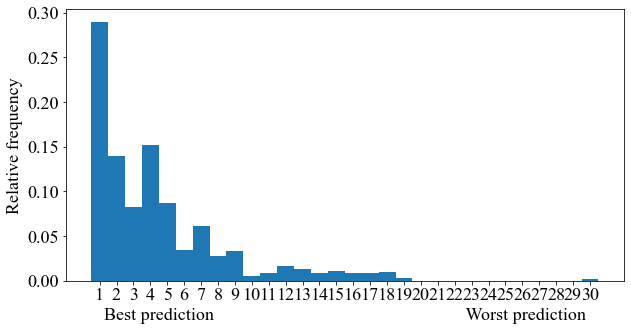

Best Accuracy:  0.28841138705021646
Top 3:  0.5115131578947368


In [7]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=200)

param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}
clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# GradientBoostingClassifier

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


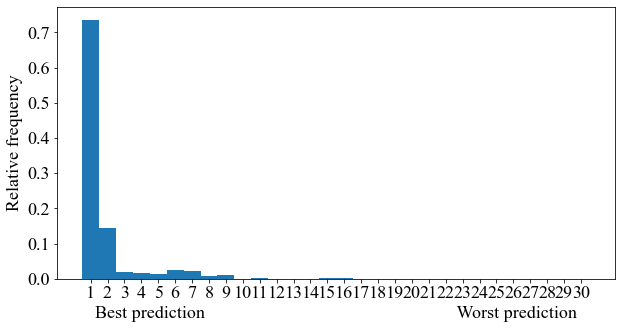

Best Accuracy:  0.7383715721893196
Top 3:  0.899671052631579


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

param_grid = {
    "learning_rate": [0.01, 0.1, 1],
}

clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# Multi Layer Perceptron

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/op

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nils/opt/anaconda3/envs/quantum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

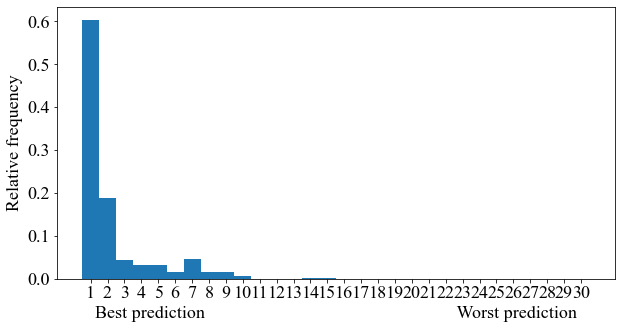

Best Accuracy:  0.6488080426019012
Top 3:  0.8338815789473685


In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=0)
param_grid = {
    "hidden_layer_sizes": [(50, 50, 50), (50, 100, 50), (100,)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.05],
    "learning_rate": ["constant", "adaptive"],
}

clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=8).fit(X_train, y_train)

y_pred = np.array(list(clf.predict(X_test)))
res = predictor.plot_eval_histogram(scores_filtered, y_pred, y_test)

print("Best Accuracy: ", clf.best_score_)
print("Top 3: ", (res.count(1) + res.count(2) + res.count(3)) / len(res))

# Debugging

In [10]:
from mqt.bench import get_one_benchmark
from predictor.src import utils

In [11]:
qc = get_one_benchmark("ae", 1, 5)

In [12]:
qc.draw()

global phase: π
           ┌──────────┐                                                      »
eval_0: ───┤ U2(0,-π) ├─────■──────────────────────■─────────────────────────»
           ├──────────┤     │                      │                         »
eval_1: ───┤ U2(0,-π) ├─────┼──────────────────────┼──────────────────────■──»
           ├──────────┤     │                      │                      │  »
eval_2: ───┤ U2(0,-π) ├─────┼──────────────────────┼──────────────────────┼──»
           ├──────────┤     │                      │                      │  »
eval_3: ───┤ U2(0,-π) ├─────┼──────────────────────┼──────────────────────┼──»
        ┌──┴──────────┴──┐┌─┴─┐┌────────────────┐┌─┴─┐┌────────────────┐┌─┴─┐»
     q: ┤ U3(0.9273,0,0) ├┤ X ├┤ U(-0.9273,0,0) ├┤ X ├┤ U3(0.9273,0,0) ├┤ X ├»
        └────────────────┘└───┘└────────────────┘└───┘└────────────────┘└───┘»
meas: 5/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                                                             »
«eval_0: ─────────────────────────────────────────────────────────────────────»
«                                                                             »
«eval_1: ────────────────────■────────────────────────────────────────────────»
«                            │                                                »
«eval_2: ────────────────────┼──────────────────────■──────────────────────■──»
«                            │                      │                      │  »
«eval_3: ────────────────────┼──────────────────────┼──────────────────────┼──»
«        ┌────────────────┐┌─┴─┐┌────────────────┐┌─┴─┐┌────────────────┐┌─┴─┐»
«     q: ┤ U(-1.8546,0,0) ├┤ X ├┤ U3(1.8546,0,0) ├┤ X ├┤ U(-3.7092,0,0) ├┤ X ├»
«        └────────────────┘└───┘└────────────────┘└───┘└────────────────┘└───┘»
«meas: 5/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                        »
«eval_0: ────────────────────────────────────────────────────────────────»
«                                                                        »
«eval_1: ────────────────────────────────────────────────────────────────»
«                                                                        »
«eval_2: ────────────────────────────────────────────────────────────────»
«                                                             ┌───┐      »
«eval_3: ─────────────────────■──────────────────────■────────┤ H ├──────»
«        ┌─────────────────┐┌─┴─┐┌────────────────┐┌─┴─┐┌─────┴───┴─────┐»
«     q: ┤ U3(2.574,-π,-π) ├┤ X ├┤ U(-7.4184,0,0) ├┤ X ├┤ U(7.4184,0,0) ├»
«        └─────────────────┘└───┘└────────────────┘└───┘└───────────────┘»
«meas: 5/════════════════════════════════════════════════════════════════»
«                                                                        »
«                                                                              »
«eval_0: ──────────────────────────■───────────────────■──────────────■────────»
«                                  │                   │        ┌───┐ │P(-π/2) »
«eval_1: ───────────■──────────────┼─────────■─────────┼────────┤ H ├─■────────»
«                   │        ┌───┐ │         │P(-π/2)  │P(-π/4) └───┘          »
«eval_2: ─■─────────┼────────┤ H ├─┼─────────■─────────■───────────────────────»
«         │P(-π/2)  │P(-π/4) └───┘ │P(-π/8)                                    »
«eval_3: ─■─────────■──────────────■───────────────────────────────────────────»
«                                                                              »
«     q: ──────────────────────────────────────────────────────────────────────»
«                                                                              »
«meas: 5/══════════════════════════════════════════

In [13]:
qc.count_ops()

OrderedDict([('cx', 8),
             ('cp', 6),
             ('u', 5),
             ('measure', 5),
             ('u2', 4),
             ('u3', 4),
             ('h', 4),
             ('barrier', 1)])

In [14]:
sum(qc.count_ops().values())

37

In [17]:
from qiskit.converters import circuit_to_dag

dag_circuit = circuit_to_dag(qc)
dag_circuit.count_ops_longest_path()

{'u2': 1,
 'cx': 8,
 'u': 4,
 'u3': 3,
 'h': 2,
 'cp': 5,
 'barrier': 1,
 'measure': 1}

In [21]:
sum(qc.count_ops())

25

In [23]:
a = utils.create_feature_dict(qc.qasm())

In [25]:
print(a.keys())

dict_keys(['tdg', 'z', 'cry', 'rxx', 'sxdg', 'crz', 'cu1', 'cu3', 'cx', 'u3', 'cswap', 'u', 'cu', 'u2', 'p', 'c3x', 'rzz', 'id', 'y', 's', 'sdg', 'ccx', 'rx', 'cz', 'rc3x', 'ry', 'rz', 'h', 'swap', 'cy', 'crx', 'sx', 'x', 'csx', 'c4x', 't', 'cp', 'u0', 'u1', 'c3sqrtx', 'rccx', 'ch', 'num_qubits', 'depth', '1_max_interactions', '2_max_interactions', '3_max_interactions', '4_max_interactions', '5_max_interactions'])


In [26]:
len(a)

49